# (Figure3)-Heterogeneity and Dynamics of Exhausted T Cells.

In [5]:
import omicverse as ov 
import scanpy as sc
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import scvelo as scv


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.10, Tutorials: https://omicverse.readthedocs.io/


[rank: 0] Global seed set to 0


In [6]:

import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties

font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

# 
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [7]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [8]:
adata_CD4.raw.to_adata()

AnnData object with n_obs × n_vars = 6816 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [9]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'C6.CD8.FOS+IL7R+.T-early_response',
    'CD8.FOS+JUN+.T-early_response':'C5.CD8.FOS+JUN+.T-early_response',
    'CD8.GZMK+.Tem':'C3.CD8.GZMK+.Tem',
    'CD8.GZMK+.Tn':'C1.CD8.GZMK+.Tn',
    'CD8.GZMK+.early_Tem':'C2.CD8.GZMK+.early_Tem',
    'CD8.ISG+.T':'C7.CD8.ISG+.T',
    'CD8.KLRD1+TYROBP+.NK-like':'C11.CD8.KLRD1+TYROBP+.NK-like',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'C9.CD8.ZNF683+CXCR6+.Trm',
    'CD8.ZNF683+CXCR6-.Trm':'C10.CD8.ZNF683+CXCR6-.Trm',
    'CD8.ZNF683-CXCR6+.Trm':'C12.CD8.ZNF683-CXCR6+.Trm',
}
adata_CD8.obs['Subcelltype_ID_type']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'C3.CD4.CAPG+.Tm',
    'CD4.CAPG+CREM-.Tm':'C4.CD4.CAPG+CREM-.Tm',
    'CD4.ADSL+.Tn':'C6.CD4.ADSL+.Tn',
    'CD4.IL21+.Tfh':'C7.CD4.IL21+.Tfh',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'C2.CD4.TNF+.T',
    'CD4.TNFRSF9+.Treg':'C11.CD4.TNFRSF9+.Treg',
    'CD4.TOX2+.Tfh':'C8.CD4.TOX2+.Tfh',
    'CD4.Tn':'C1.CD4.Tn',
    'CD4.TMP1+.Tm':'C5.CD4.TMP1+.Tm',
}
adata_CD4.obs['Subcelltype_ID_type']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [10]:
type_color_rna={
    'CD8.CXCL13+.Termianl_Tex':'C4.CD8.CXCL13+.Termianl_Tex',
    'CD8.FOS+IL7R+.T-early_response':'Other_celltype',
    'CD8.FOS+JUN+.T-early_response':'Other_celltype',
    'CD8.GZMK+.Tem':'Other_celltype',
    'CD8.GZMK+.Tn':'Other_celltype',
    'CD8.GZMK+.early_Tem':'Other_celltype',
    'CD8.ISG+.T':'Other_celltype',
    'CD8.KLRD1+TYROBP+.NK-like':'Other_celltype',
    'CD8.MAIT':'C8.CD8.MAIT',
    'CD8.ZNF683+CXCR6+.Trm':'Other_celltype',
    'CD8.ZNF683+CXCR6-.Trm':'Other_celltype',
    'CD8.ZNF683-CXCR6+.Trm':'Other_celltype',
}
adata_CD8.obs['Subcelltype_ID_other_exhausted']=adata_CD8.obs['Subcelltype'].map(type_color_rna).astype('category')

type_color_rna={
    'CD4.CAPG+.Tm':'Other_celltype',
    'CD4.CAPG+CREM-.Tm':'Other_celltype',
    'CD4.ADSL+.Tn':'Other_celltype',
    'CD4.IL21+.Tfh':'Other_celltype',
    'CD4.IL26+.Th17':'C9.CD4.IL26+.Th17',
    'CD4.LAG3+.Treg':'C10.CD4.LAG3+.Treg',
    'CD4.TNF+.T':'Other_celltype',
    'CD4.TNFRSF9+.Treg':'Other_celltype',
    'CD4.TOX2+.Tfh':'Other_celltype',
    'CD4.Tn':'Other_celltype',
    'CD4.TMP1+.Tm':'Other_celltype',
}
adata_CD4.obs['Subcelltype_ID_other_exhausted']=adata_CD4.obs['Subcelltype'].map(type_color_rna).astype('category')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
CD4_dict = dict(zip(adata_CD4.obs['Subcelltype_ID_type'].cat.categories, adata_CD4.uns['Subcelltype_colors']))
CD8_dict = dict(zip(adata_CD8.obs['Subcelltype_ID_type'].cat.categories, adata_CD8.uns['Subcelltype_colors']))
CD4_dict.update(CD8_dict)
label_colors = CD4_dict
label_colors_new = {'C10.CD4.LAG3+.Treg': '#D41661','C9.CD4.IL26+.Th17': '#F2BC1D','C8.CD8.MAIT': '#A22E2A','C4.CD8.CXCL13+.Termianl_Tex': '#2D5C33',
                    'Other_celltype':'#000000',
                   }

In [12]:
adata_CD4_part = adata_CD4[adata_CD4.obs['Subcelltype'].isin(['CD4.IL26+.Th17','CD4.LAG3+.Treg'])]
adata_CD8_part = adata_CD8[adata_CD8.obs['Subcelltype'].isin(['CD8.MAIT','CD8.CXCL13+.Termianl_Tex'])]
adata_CD4_part,adata_CD8_part

(View of AnnData object with n_obs × n_vars = 691 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
     uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 View of AnnData object with n_obs × n_vars = 688 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
     uns: 'Person_colors

In [13]:
import anndata as ad
adata = ad.concat([adata_CD4_part,adata_CD8_part])
adata_other = ad.concat([adata_CD4,adata_CD8])
#adata = adata.raw.to_adata()
adata,adata_other

(AnnData object with n_obs × n_vars = 1379 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 13000 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts')

# Marker_Gene

In [36]:
category_order = ['Other_celltype','C9.CD4.IL26+.Th17','C10.CD4.LAG3+.Treg','C4.CD8.CXCL13+.Termianl_Tex','C8.CD8.MAIT',]
import pandas as pd
adata_other.obs['Subcelltype_ID_other_exhausted'] = pd.Categorical(adata_other.obs['Subcelltype_ID_other_exhausted'], categories=category_order, ordered=True)


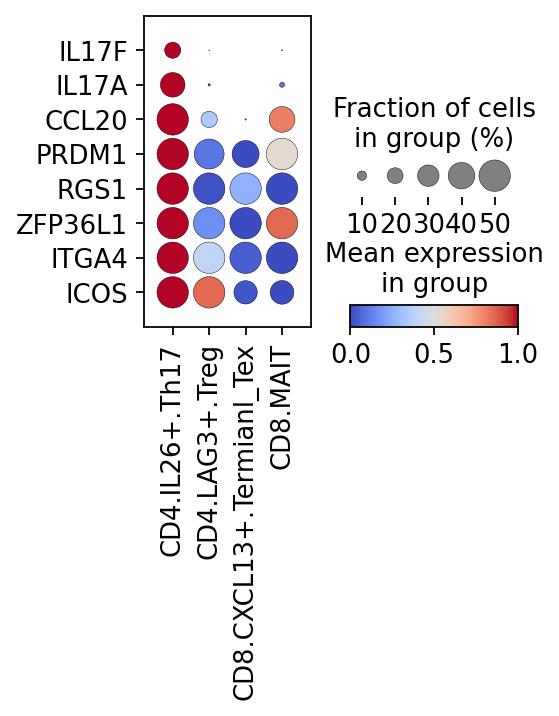

In [171]:
marker_genes_list = ['IL17F','IL17A','CCL20','PRDM1','RGS1','ZFP36L1','ITGA4','ICOS',]
    
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, # 
    figsize=(3,2.56),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/Figure3/Figure3_A1.png', dpi=300,bbox_inches = 'tight')

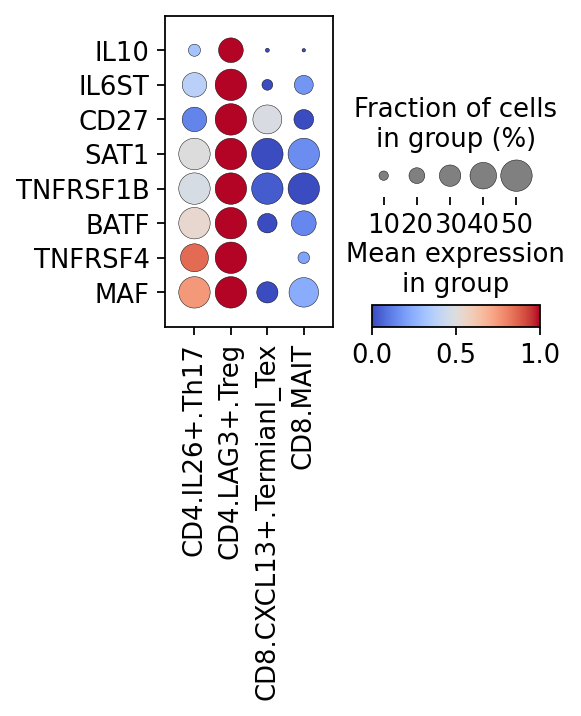

In [170]:
marker_genes_list = ['IL10','IL6ST','CD27','SAT1','TNFRSF1B','BATF','TNFRSF4','MAF']
    
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, #
    figsize=(3,2.56),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Figure/Figure3/Figure3_A2.png', dpi=300,bbox_inches = 'tight')

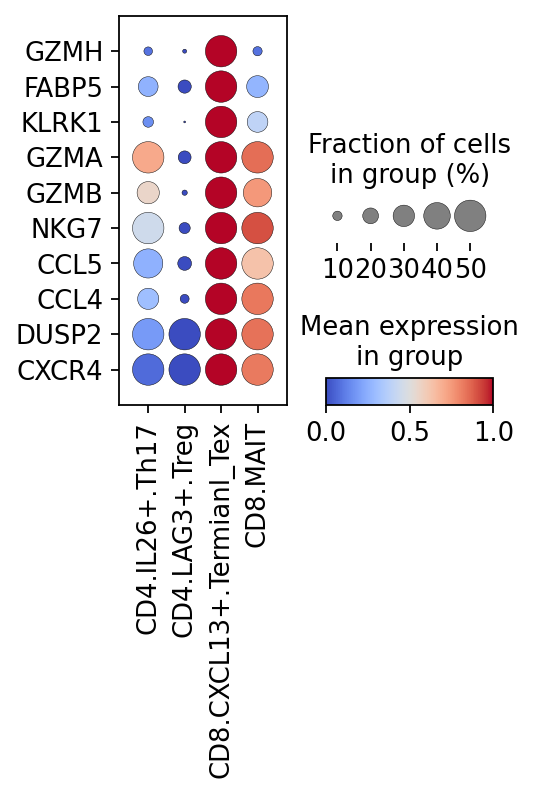

In [169]:
marker_genes_list = ['GZMH','FABP5','KLRK1','GZMA','GZMB','NKG7','CCL5','CCL4','DUSP2','CXCR4',]
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(3,3.2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/Figure3/Figure3_A3.png', dpi=300,bbox_inches = 'tight')

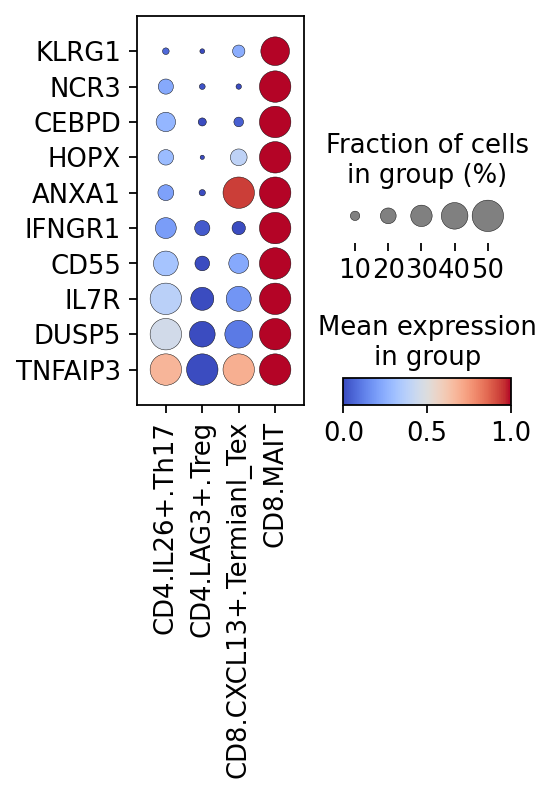

In [168]:
marker_genes_list = ['KLRG1','NCR3','CEBPD','HOPX','ANXA1','IFNGR1','CD55','IL7R','DUSP5','TNFAIP3',]
    
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(3,3.2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/Figure3/Figure3_A4.png', dpi=300,bbox_inches = 'tight')

In [39]:
adata_other = adata_other.raw.to_adata()

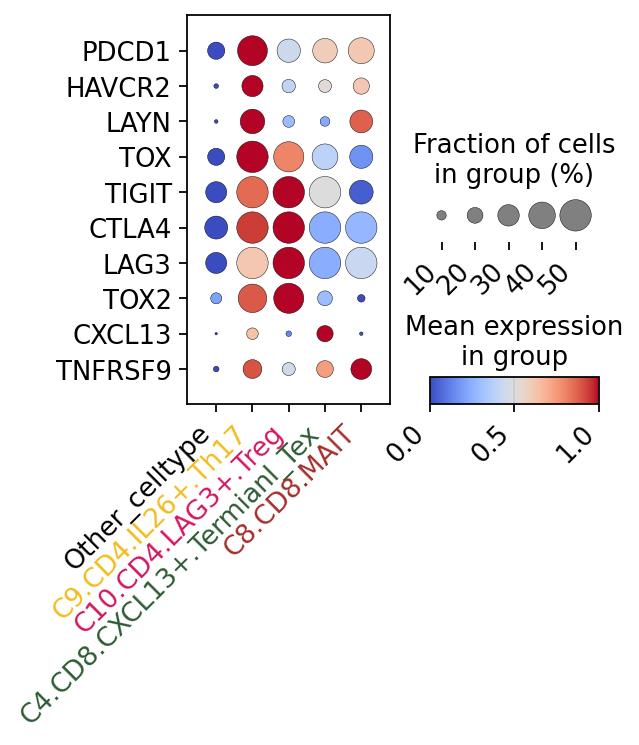

In [307]:
marker_genes_list = ['PDCD1','HAVCR2','LAYN','TOX','TIGIT','CTLA4','LAG3','TOX2','CXCL13','TNFRSF9',]
    

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_other,
    marker_genes_list,
    groupby='Subcelltype_ID_other_exhausted',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(3.3,3.2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
import scanpy as sc
import matplotlib.pyplot as plt

for label in ax['mainplot_ax'].get_xticklabels():
    label_text = label.get_text()
    if label_text in label_colors_new:
        label.set_color(label_colors_new[label_text])
    plt.setp(ax['mainplot_ax'].get_xticklabels(), fontsize='12')  # 
    
for ax in ax.values():  #
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')
plt.savefig('Gastric/Figure/Figure3/Figure3_A5.png', dpi=300,bbox_inches = 'tight')

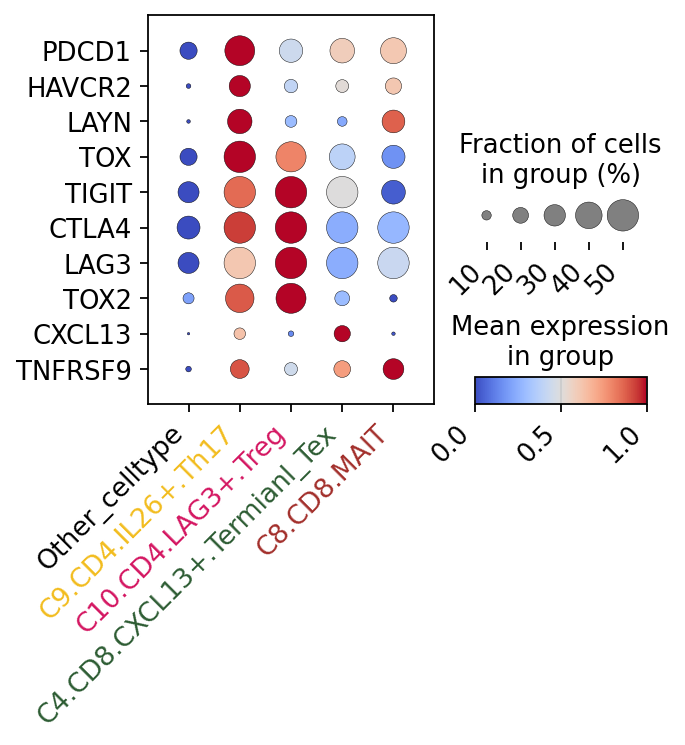

In [331]:
marker_genes_list = ['PDCD1','HAVCR2','LAYN','TOX','TIGIT','CTLA4','LAG3','TOX2','CXCL13','TNFRSF9',]
    

#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata_other,
    marker_genes_list,
    groupby='Subcelltype_ID_other_exhausted',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=True,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, # 是否需要var
    figsize=(4,3.2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
import scanpy as sc
import matplotlib.pyplot as plt

for label in ax['mainplot_ax'].get_xticklabels():
    label_text = label.get_text()
    if label_text in label_colors_new:
        label.set_color(label_colors_new[label_text])
    plt.setp(ax['mainplot_ax'].get_xticklabels(), fontsize='12') 
    
for ax in ax.values():  
    labels = [item.get_text() for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right')
plt.savefig('Gastric/Figure/Figure3/Figure3_A_legend.png', dpi=300,bbox_inches = 'tight')

# DEG

In [24]:
import anndata as ad
adata = ad.concat([adata_CD4_part,adata_CD8_part])
adata_other = ad.concat([adata_CD4,adata_CD8])
#adata = adata.raw.to_adata()
adata,adata_other

(AnnData object with n_obs × n_vars = 1379 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts',
 AnnData object with n_obs × n_vars = 13000 × 2000
     obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
     obsm: 'X_pca', 'X_scVI', 'X_umap')

In [25]:
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 1379 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

In [26]:
adata.uns['Sample_colors'] = ["#1f77b4", "#279e68", '#ff7f0e']


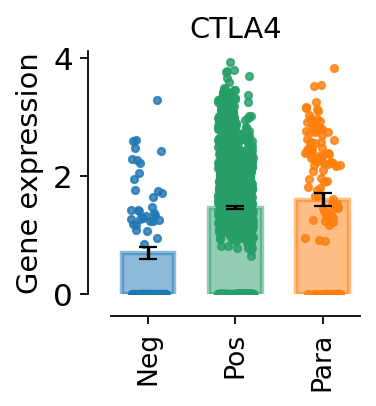

In [27]:
fig, ax = plt.subplots(figsize=(2,2))
ov.pl.bardotplot(adata,groupby='Sample',color='CTLA4',
           ax=ax,
          ylabel='Gene expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})


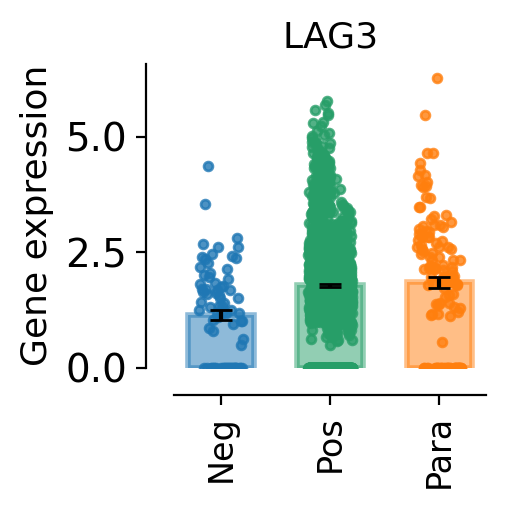

In [109]:
fig, ax = plt.subplots(figsize=(2,2))
ov.pl.bardotplot(adata,groupby='Sample',color='LAG3',
           ax=ax,
          ylabel='Gene expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})


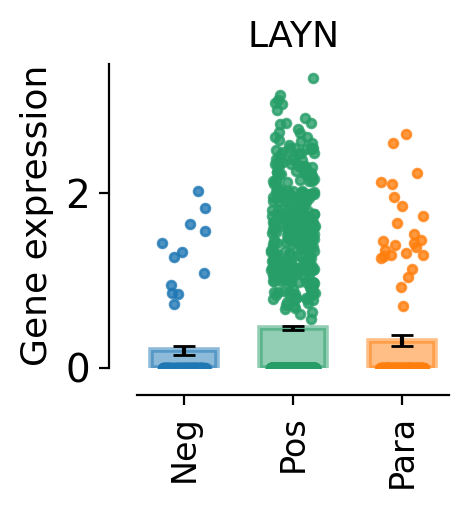

In [104]:
fig, ax = plt.subplots(figsize=(2,2))
ov.pl.bardotplot(adata,groupby='Sample',color='LAYN',
           ax=ax,
          ylabel='Gene expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})


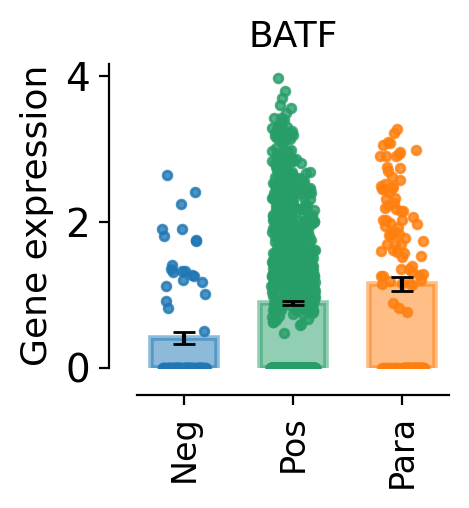

In [108]:
fig, ax = plt.subplots(figsize=(2,2))
ov.pl.bardotplot(adata,groupby='Sample',color='BATF',
           ax=ax,
          ylabel='Gene expression',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})


# Trajectory

In [38]:
adata_CD8

AnnData object with n_obs × n_vars = 6184 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [14]:
v0 = ov.single.pyVIA(adata=adata_CD8,adata_key='X_scVI',adata_ncomps=10, basis='X_umap',
                    resolution_parameter=0.6,clusters='Subcelltype',knn=50,random_seed=4,root_user=['CD8.GZMK+.Tn'])

v0.run()

2024-05-28 11:10:05.912962	Running VIA over input data of 6184 (samples) x 10 (features)
2024-05-28 11:10:05.913185	Knngraph has 50 neighbors
2024-05-28 11:10:09.910484	Finished global pruning of 50-knn graph used for clustering at level of 0.15. Kept 47.0 % of edges. 
2024-05-28 11:10:09.947093	Number of connected components used for clustergraph  is 1
2024-05-28 11:10:10.550732	Commencing community detection
2024-05-28 11:10:11.667403	Finished running Leiden algorithm. Found 12 clusters.
2024-05-28 11:10:11.670060	Merging 1 very small clusters (<10)
2024-05-28 11:10:11.671088	Finished detecting communities. Found 11 communities
2024-05-28 11:10:11.671396	Making cluster graph. Global cluster graph pruning level: 0.15
2024-05-28 11:10:11.778037	Graph has 1 connected components before pruning
2024-05-28 11:10:11.801728	Graph has 1 connected components after pruning
2024-05-28 11:10:11.801886	Graph has 1 connected components after reconnecting
2024-05-28 11:10:11.802866	0.0% links trimme

...the pseudotime of VIA added to AnnData obs named `pt_via`
running PAGA using priors: ['pt_via']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


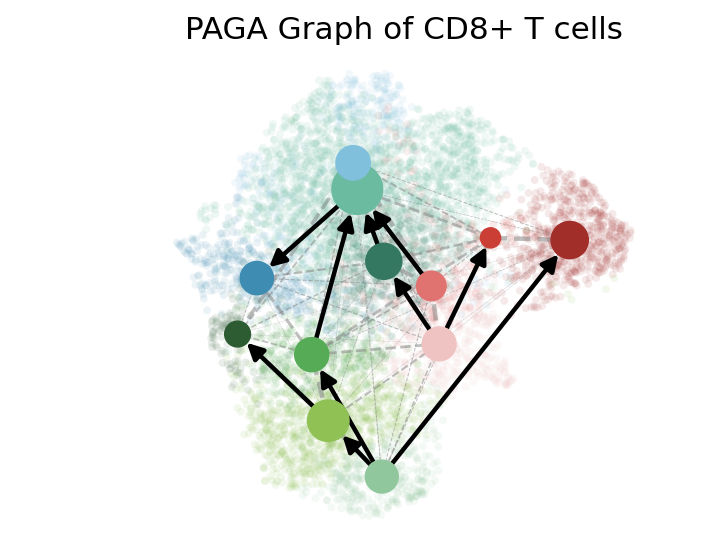

In [18]:
v0.get_pseudotime(v0.adata)
ov.utils.cal_paga(adata_CD8,use_time_prior='pt_via',vkey='paga',
                 groups='Subcelltype')
ov.utils.plot_paga(adata_CD8,basis='umap', size=50, alpha=.1,title='PAGA Graph of CD8+ T cells',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False,figsize=(4,4))
plt.savefig("astric/Figure/Figure3/Figure3_B_1.png",dpi=300,bbox_inches = 'tight')

In [16]:
v0 = ov.single.pyVIA(adata=adata_CD4,adata_key='X_scVI',adata_ncomps=80, basis='X_umap',
                         clusters='Subcelltype',knn=30,random_seed=4,root_user=['CD4.Tn'],)

v0.run()

2024-05-28 11:10:25.065318	Running VIA over input data of 6816 (samples) x 10 (features)
2024-05-28 11:10:25.065428	Knngraph has 30 neighbors
2024-05-28 11:10:28.474855	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 47.7 % of edges. 
2024-05-28 11:10:28.505689	Number of connected components used for clustergraph  is 1
2024-05-28 11:10:28.795292	Commencing community detection
2024-05-28 11:10:29.587688	Finished running Leiden algorithm. Found 28 clusters.
2024-05-28 11:10:29.589349	Merging 12 very small clusters (<10)
2024-05-28 11:10:29.590671	Finished detecting communities. Found 16 communities
2024-05-28 11:10:29.591007	Making cluster graph. Global cluster graph pruning level: 0.15
2024-05-28 11:10:29.606637	Graph has 1 connected components before pruning
2024-05-28 11:10:29.607987	Graph has 1 connected components after pruning
2024-05-28 11:10:29.608133	Graph has 1 connected components after reconnecting
2024-05-28 11:10:29.608562	0.0% links trimm

...the pseudotime of VIA added to AnnData obs named `pt_via`
running PAGA using priors: ['pt_via']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


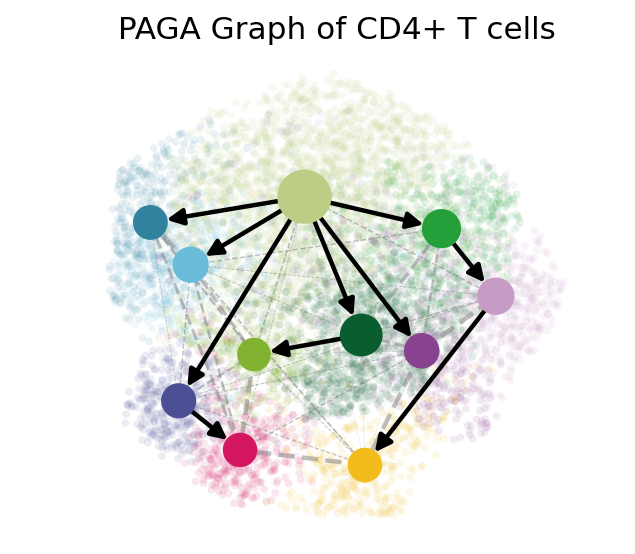

In [19]:
v0.get_pseudotime(v0.adata)
ov.utils.cal_paga(adata_CD4,use_time_prior='pt_via',vkey='paga',
                 groups='Subcelltype')

ov.utils.plot_paga(adata_CD4,basis='umap', size=50, alpha=.1,title='PAGA Graph of CD4+ T cells',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False,figsize=(4,4))
plt.savefig("Gastric/Figure/Figure3/Figure3_B_2.png",dpi=300,bbox_inches = 'tight')

# Pathway

In [435]:
import anndata as ad
adata = ad.concat([adata_CD4_part,adata_CD8_part])
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 1379 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
    obsm: 'X_pca', 'X_scVI', 'X_umap'

In [436]:
marker_genes_dict = {
    'Th17':['CCL20','TNFSF12','CCR6','IL17A','IL17F','CCR6',],
    'Treg':['IL6ST','IL10','IFNAR2','FAS','IL32',],
    'Tex':['CCL5','CCL4','CXCR4','IL16','CCL4','CXCL13',],
    'MAIT':['IL7R','IFNGR1','TGFB1','NFKBIA','NFKB1','CCL4L2','CCL3','TNFSF9'],
}

    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_Subcelltype']`
    using 'X_pca' with n_pcs = 100
Storing dendrogram info using `.uns['dendrogram_Subcelltype_ID_type']`
categories: C4.CD8.CXCL13+.Termianl_Tex, C8.CD8.MAIT, C9.CD4.IL26+.Th17, etc.
var_group_labels: Th17, Treg, Tex, etc.


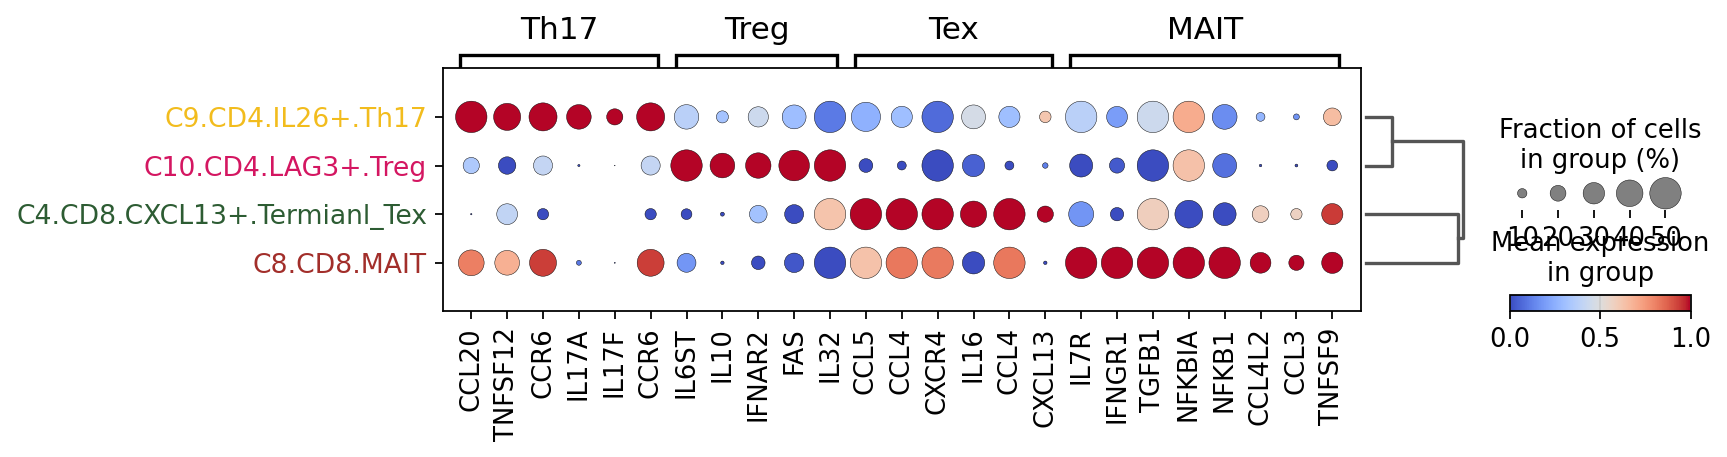

In [437]:
sc.tl.dendrogram(adata,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_dict,
    groupby='Subcelltype_ID_type',
    dendrogram=True,
    color_map="coolwarm",
    swap_axes=False,
    use_raw=False,
    standard_scale="var",
    var_group_labels=False, 
    figsize=(10,2),
    return_fig=False,dot_max=0.5,
    show=False,
)
for label in ax['mainplot_ax'].get_yticklabels():
    label_text = label.get_text()
    if label_text in label_colors:
        label.set_color(label_colors[label_text])
    plt.setp(ax['mainplot_ax'].get_yticklabels(), fontsize='12')  
plt.savefig("Gastric/Figure/Figure3/Figure3_D_legend.png",dpi=300,bbox_inches = 'tight')

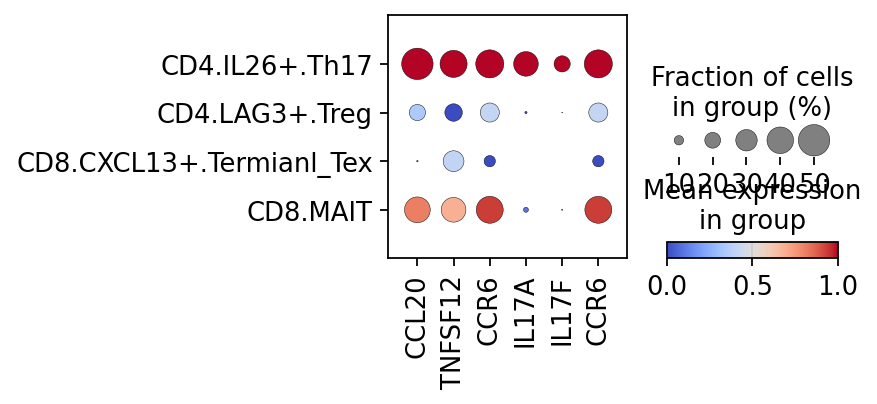

In [438]:
marker_genes_list = ['CCL20','TNFSF12','CCR6','IL17A','IL17F','CCR6',]
    
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=False,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True,
    figsize=(3.6,2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Figure/Figure3/Figure3_D1.png', dpi=300,bbox_inches = 'tight')

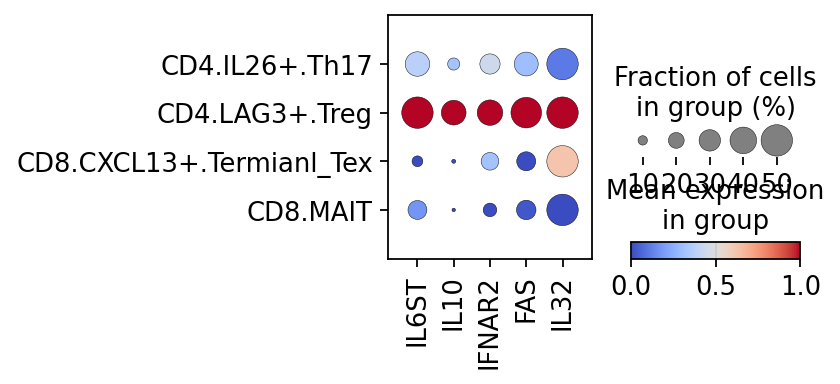

In [439]:
marker_genes_list = ['IL6ST','IL10','IFNAR2','FAS','IL32',]
    
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=False,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(3.3,2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/Figure3/Figure3_D2.png', dpi=300,bbox_inches = 'tight')

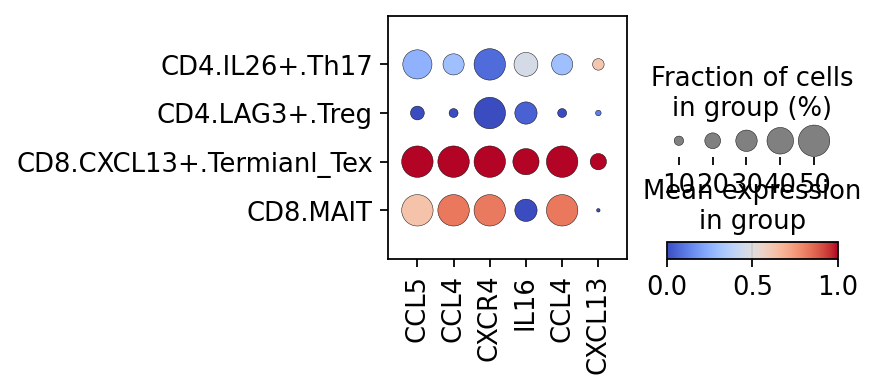

In [440]:
marker_genes_list = ['CCL5','CCL4','CXCR4','IL16','CCL4','CXCL13',]
    
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=False,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(3.6,2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/Figure3/Figure3_D3.png', dpi=300,bbox_inches = 'tight')

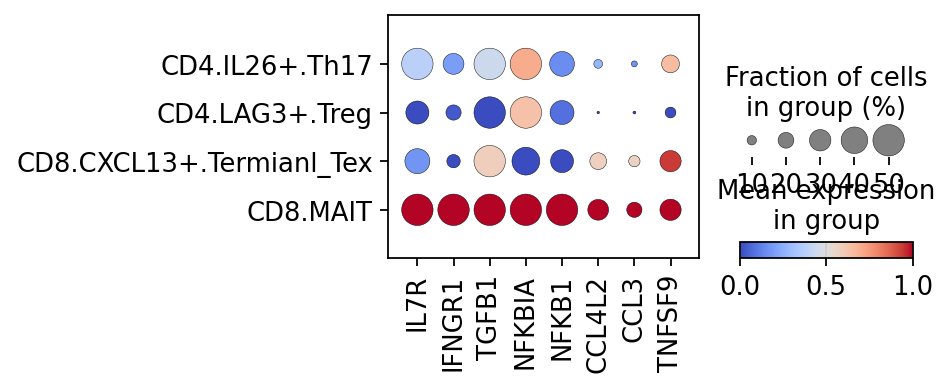

In [441]:
marker_genes_list = ['IL7R','IFNGR1','TGFB1','NFKBIA','NFKB1','CCL4L2','CCL3','TNFSF9']
    
#sc.tl.dendrogram(adata_CD8,groupby='Subcelltype')

ax = sc.pl.dotplot(
    adata,
    marker_genes_list,
    groupby='Subcelltype',
    dendrogram=False,
    color_map="coolwarm",
    swap_axes=False,
    use_raw=False,
    standard_scale="var",
    var_group_labels=True, 
    figsize=(4.2,2),
    return_fig=False,
    show=False,
    dot_max=0.5,
)
plt.savefig('Gastric/Figure/Figure3/Figure3_D4.png', dpi=300,bbox_inches = 'tight')

In [20]:
pathway_dict=ov.utils.geneset_prepare('Gastric/Reference/genesets/KEGG_2021_Human.txt',organism='Human')
sc.tl.score_genes(adata, pathway_dict['Cytokine-cytokine receptor interaction'], score_name = 'Cytokine-cytokine receptor interaction'+' score')
from sklearn.preprocessing import StandardScaler

pathway_list = ['Cytokine-cytokine receptor interaction']
for pathway_name in pathway_list:
    # 选择要标准化的列
    column_to_normalize = pathway_name+' score'
    scaler = StandardScaler()
    adata.obs['Z score of '+pathway_name] = scaler.fit_transform(adata.obs[[pathway_name+' score']])

computing score 'Cytokine-cytokine receptor interaction score'
    finished: added
    'Cytokine-cytokine receptor interaction score', score of gene set (adata.obs).
    793 total control genes are used. (0:00:00)


In [21]:
adata.uns['Subcelltype_colors'] = ['#F2BC1D', '#D41661', '#2D5C33','#A22E2A',]
adata.uns['Subcelltype_ID_type_colors'] = ['#2D5C33','#A22E2A','#F2BC1D','#D41661',]
adata.uns['Sample_colors'] = adata_CD4.uns['Sample_colors']

In [22]:
adata.obs['Subcelltype_ID_type'].cat.categories

Index(['C4.CD8.CXCL13+.Termianl_Tex', 'C8.CD8.MAIT', 'C9.CD4.IL26+.Th17',
       'C10.CD4.LAG3+.Treg'],
      dtype='object')

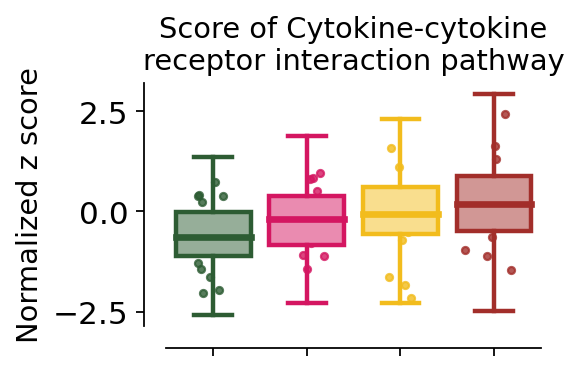

In [24]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')

ax = ov.pl.single_group_boxplot(adata,groupby='Subcelltype_ID_type',
             color='Z score of Cytokine-cytokine receptor interaction',
             type_color_dict=dict(zip(pd.Categorical(adata.obs['Subcelltype_ID_type']).categories, adata.uns['Subcelltype_ID_type_colors'])),
             x_ticks_plot=False,
             figsize=(3,2),
             kruskal_test=False,
             ylabel='Normalized z score',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Score of Cytokine-cytokine\nreceptor interaction pathway',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             )
    
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig('Gastric/Figure/Figure3/Figure3_C.png', dpi=300,bbox_inches = 'tight')

In [29]:
adata.obs['Subcelltype_ID_type']

ACATGGTTCGTTTGCC-1_0               C9.CD4.IL26+.Th17
ACCAGTAGTAGATTAG-1_0              C10.CD4.LAG3+.Treg
AGCGGTCGTGTTCGAT-1_0              C10.CD4.LAG3+.Treg
AGCTTGACATAGGATA-1_0               C9.CD4.IL26+.Th17
AGTGAGGAGAAGGACA-1_0               C9.CD4.IL26+.Th17
                                    ...             
TGACTTTTCACTCCTG-1_11                    C8.CD8.MAIT
TGATTTCGTATCGCAT-1_11    C4.CD8.CXCL13+.Termianl_Tex
TTAGGACAGTTCCACA-1_11                    C8.CD8.MAIT
TTAGGACGTCTCAACA-1_11                    C8.CD8.MAIT
TTGAACGGTTGGTGGA-1_11    C4.CD8.CXCL13+.Termianl_Tex
Name: Subcelltype_ID_type, Length: 1379, dtype: category
Categories (4, object): ['C4.CD8.CXCL13+.Termianl_Tex', 'C8.CD8.MAIT', 'C9.CD4.IL26+.Th17', 'C10.CD4.LAG3+.Treg']

In [30]:
from scipy.stats import ttest_ind

# 假设这是你的两列列表
list1 = adata.obs.loc[adata.obs['Subcelltype_ID_type']=='C4.CD8.CXCL13+.Termianl_Tex','Z score of Cytokine-cytokine receptor interaction']  # 第一组数据
list2 = adata.obs.loc[adata.obs['Subcelltype_ID_type']=='C10.CD4.LAG3+.Treg','Z score of Cytokine-cytokine receptor interaction']  # 第二组数据

# 进行t-test
t_stat, p_value = ttest_ind(list1, list2, equal_var=True)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


t-statistic: -3.4315492822627216
p-value: 0.0006537178309708641
两组数据之间有显著差异。


# MAIT 

In [8]:
adata_CD8

AnnData object with n_obs × n_vars = 6184 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

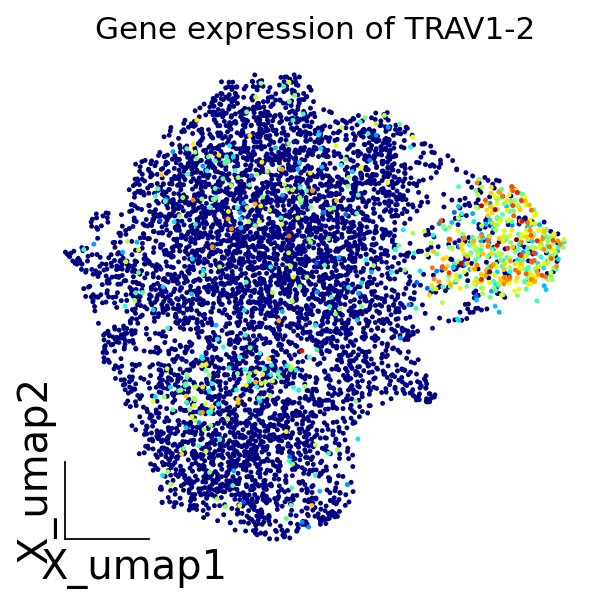

In [26]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)
all_genes = ['TRAV1-2','LAG3']
axes = ov.utils.embedding(adata_CD8,
                               basis='X_umap',
                               color='TRAV1-2',
                               title='Gene expression of TRAV1-2',
                               frameon='small',
                               show=False,
                               legend_loc=False,
                               color_map = 'jet',
                               colorbar_loc=None,
                               legend_fontsize=18,
                            #   vmax = 
                               ax=axes)
axes.set_title('Gene expression of TRAV1-2',fontdict={'size':14})

plt.tight_layout()
plt.savefig('Gastric/Figure/Figure3/Figure3_F_1.png', dpi=300,bbox_inches = 'tight')
plt.show()


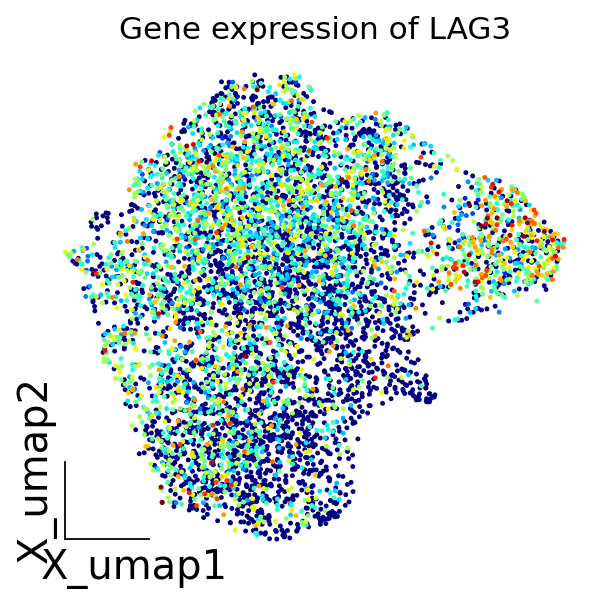

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), sharex=True, sharey=True)
axes = ov.utils.embedding(adata_CD8,
                               basis='X_umap',
                               color='LAG3',
                               title='Gene expression of LAG3',
                               frameon='small',
                               show=False,
                               legend_loc=False,
                               color_map = 'jet',
                               colorbar_loc=None,
                               legend_fontsize=18,
                               vmax = 3.5,
                               ax=axes)
axes.set_title('Gene expression of LAG3',fontdict={'size':14})

plt.tight_layout()
plt.savefig('Gastric/Figure/Figure3/Figure3_F_2.png', dpi=300)
plt.show()


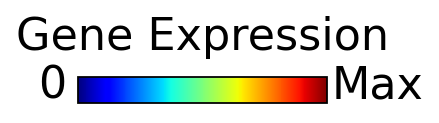

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_color_bar(camp='',pathway=''):
    data = np.linspace(0, 1, 100).reshape(1, -1)
    max_value = np.max(data)
    min_value = 0
    max_label = 2.5  
    
    colormap = mpl.cm.get_cmap(camp)

    fig, ax = plt.subplots(figsize=(2, 0.3))  

    norm = mpl.colors.Normalize(vmin=min_value, vmax=max_label)
    cb = mpl.colorbar.ColorbarBase(ax, cmap=colormap, norm=norm, orientation='horizontal')

    cb.ax.set_title('Gene Expression', fontsize=20, pad=12)  

    cb.ax.text(-0.25, -0.15, '0', ha='center', va='bottom', fontsize=20)
    cb.ax.text(3.0, -0.15, 'Max', ha='center', va='bottom', fontsize=20)
    
    fig.subplots_adjust(top=0.7)
    
    cb.ax.set_xticks([])

    #plt.show()
    plt.savefig(pathway, dpi=300, bbox_inches='tight')
    #plt.savefig('colorbar_plot.png', bbox_inches='tight')

plot_color_bar(camp='jet',pathway='Gastric/Figure/Figure3/Figure3_legend.png')


In [30]:
Mait = adata_CD8[adata_CD8.obs['Subcelltype']=='CD8.MAIT']
Mait

View of AnnData object with n_obs × n_vars = 563 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [50]:
Mait

AnnData object with n_obs × n_vars = 563 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'Subcelltype_ID_type', 'Subcelltype_ID_other_exhausted', 'CCL20', 'CCL20_normalized'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

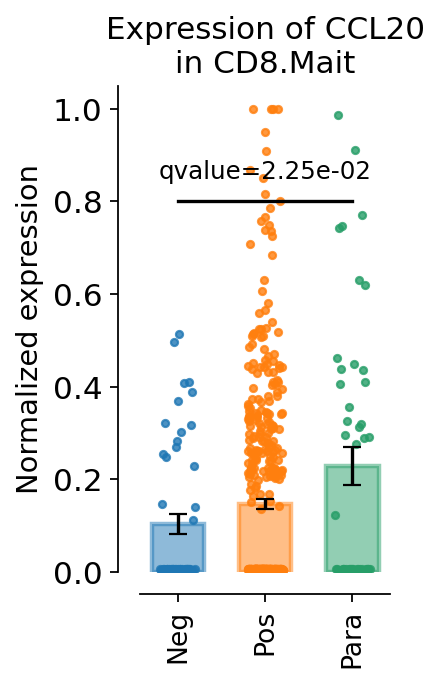

In [69]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind

fig, ax = plt.subplots(figsize=(2,4))

Mait.obs['CCL20'] = Mait.to_df().loc[:,'CCL20']
column = 'CCL20'
Mait.obs[column + '_normalized'] = (Mait.obs[column] - Mait.obs[column].min()) / (Mait.obs[column].max() - Mait.obs[column].min())

ov.pl.bardotplot(Mait,groupby='Sample',color=(column+'_normalized'),figsize=(3,4),
           ax=ax,
           ylabel='Normalized expression',
          # title='Exhausted score of CD8.Mait',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
ax.set_title('Expression of CCL20\nin CD8.Mait',fontsize=14)

# 执行t检验
group_neg = Mait[Mait.obs['Sample'] == 'Neg'].obs[column+'_normalized']
group_pos = Mait[Mait.obs['Sample'] == 'Pos'].obs[column+'_normalized']
group_para = Mait[Mait.obs['Sample'] == 'Para'].obs[column+'_normalized']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

# 将计算得到的P值放入一个列表中
p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

# 使用BH方法进行FDR修正
p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]
p_value_neg_pos = "{:.2e}".format(adjusted_p_values[1])

ov.pl.add_palue(ax,line_x1=0,line_x2=2,line_y=0.8,
          text_y=0.05,
          text='qvalue={}'.format(p_value_neg_pos),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)
plt.savefig('Gastric/Figure/Figure3/Figure3_H_1.png', dpi=300,bbox_inches = 'tight')


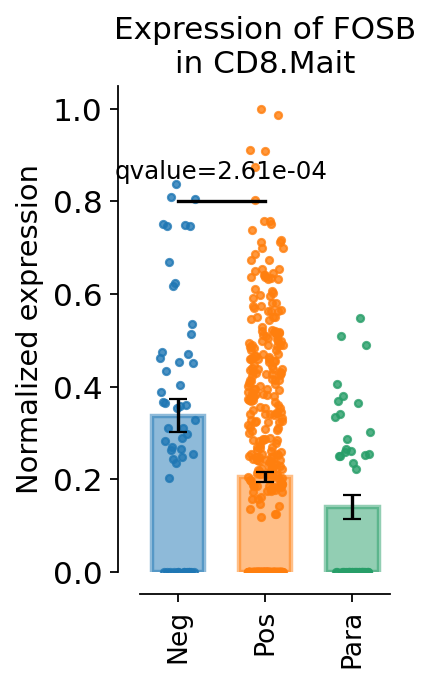

In [65]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind

fig, ax = plt.subplots(figsize=(2,4))

Mait.obs['FOSB'] = Mait.raw.to_adata().to_df().loc[:,'FOSB']
column = 'FOSB'
Mait.obs[column + '_normalized'] = (Mait.obs[column] - Mait.obs[column].min()) / (Mait.obs[column].max() - Mait.obs[column].min())

ov.pl.bardotplot(Mait,groupby='Sample',color=(column+'_normalized'),figsize=(3,4),
           ax=ax,
           ylabel='Normalized expression',
          # title='Exhausted score of CD8.Mait',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
ax.set_title('Expression of FOSB\nin CD8.Mait',fontsize=14)

# 执行t检验
group_neg = Mait[Mait.obs['Sample'] == 'Neg'].obs[column+'_normalized']
group_pos = Mait[Mait.obs['Sample'] == 'Pos'].obs[column+'_normalized']
group_para = Mait[Mait.obs['Sample'] == 'Para'].obs[column+'_normalized']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

# 将计算得到的P值放入一个列表中
p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

# 使用BH方法进行FDR修正
p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]
p_value_neg_pos = "{:.2e}".format(adjusted_p_values[0])

ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=0.8,
          text_y=0.05,
          text='qvalue={}'.format(p_value_neg_pos),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)
plt.savefig('Gastric/Figure/Figure3/Figure3_H_2.png', dpi=300,bbox_inches = 'tight')


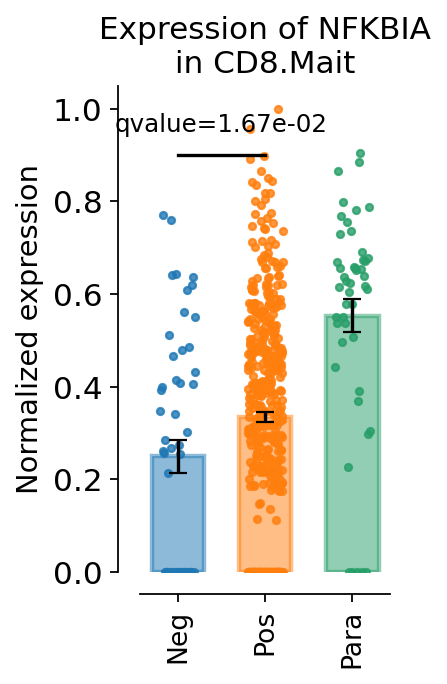

In [66]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind

fig, ax = plt.subplots(figsize=(2,4))

Mait.obs['NFKBIA'] = Mait.raw.to_adata().to_df().loc[:,'NFKBIA']
column = 'NFKBIA'
Mait.obs[column + '_normalized'] = (Mait.obs[column] - Mait.obs[column].min()) / (Mait.obs[column].max() - Mait.obs[column].min())

ov.pl.bardotplot(Mait,groupby='Sample',color=(column+'_normalized'),figsize=(3,4),
           ax=ax,
           ylabel='Normalized expression',
          # title='Exhausted score of CD8.Mait',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
ax.set_title('Expression of NFKBIA\nin CD8.Mait',fontsize=14)

# 执行t检验
group_neg = Mait[Mait.obs['Sample'] == 'Neg'].obs[column+'_normalized']
group_pos = Mait[Mait.obs['Sample'] == 'Pos'].obs[column+'_normalized']
group_para = Mait[Mait.obs['Sample'] == 'Para'].obs[column+'_normalized']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

# 将计算得到的P值放入一个列表中
p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

# 使用BH方法进行FDR修正
p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]
p_value_neg_pos = "{:.2e}".format(adjusted_p_values[0])

ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=0.9,
          text_y=0.05,
          text='qvalue={}'.format(p_value_neg_pos),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)
plt.savefig('Gastric/Figure/Figure3/Figure3_H_3.png', dpi=300,bbox_inches = 'tight')


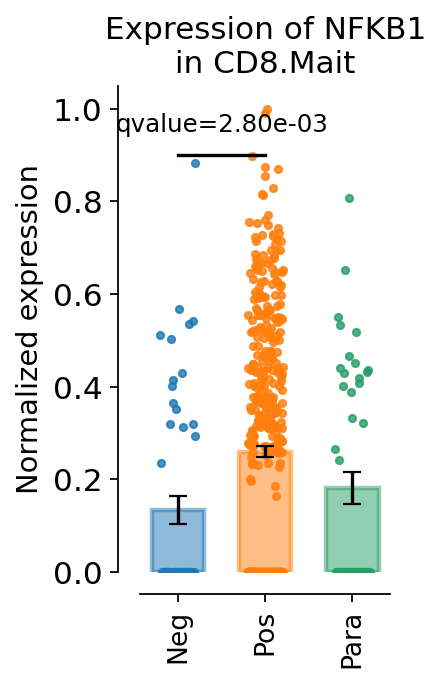

In [67]:
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_ind

fig, ax = plt.subplots(figsize=(2,4))

Mait.obs['NFKB1'] = Mait.raw.to_adata().to_df().loc[:,'NFKB1']
column = 'NFKB1'
Mait.obs[column + '_normalized'] = (Mait.obs[column] - Mait.obs[column].min()) / (Mait.obs[column].max() - Mait.obs[column].min())

ov.pl.bardotplot(Mait,groupby='Sample',color=(column+'_normalized'),figsize=(3,4),
           ax=ax,
           ylabel='Normalized expression',
          # title='Exhausted score of CD8.Mait',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
ax.set_title('Expression of NFKB1\nin CD8.Mait',fontsize=14)

# 执行t检验
group_neg = Mait[Mait.obs['Sample'] == 'Neg'].obs[column+'_normalized']
group_pos = Mait[Mait.obs['Sample'] == 'Pos'].obs[column+'_normalized']
group_para = Mait[Mait.obs['Sample'] == 'Para'].obs[column+'_normalized']

t_stat_neg_pos, p_value_neg_pos = ttest_ind(group_neg, group_pos)
t_stat_neg_para, p_value_neg_para = ttest_ind(group_neg, group_para)
t_stat_pos_para, p_value_pos_para = ttest_ind(group_pos, group_para)

# 将计算得到的P值放入一个列表中
p_values = [p_value_neg_pos, p_value_neg_para, p_value_pos_para]

# 使用BH方法进行FDR修正
p_adjusted = multipletests(p_values, alpha=0.05, method='fdr_bh')
adjusted_p_values = p_adjusted[1]
p_value_neg_pos = "{:.2e}".format(adjusted_p_values[0])

ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=0.9,
          text_y=0.05,
          text='qvalue={}'.format(p_value_neg_pos),
          fontsize=11,fontcolor='#000000',
             horizontalalignment='center',)
plt.savefig('Gastric/Figure/Figure3/Figure3_H_4.png', dpi=300,bbox_inches = 'tight')
